In [1]:
#import tensorflow as ts
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [6]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [7]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=20,validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 61s 377ms/step - loss: 1.7840 - accuracy: 0.3320 - val_loss: 1.6504 - val_accuracy: 0.4029
Epoch 2/20
157/157 [==============================] - 58s 368ms/step - loss: 1.4392 - accuracy: 0.4764 - val_loss: 1.3245 - val_accuracy: 0.5169
Epoch 3/20
157/157 [==============================] - 56s 358ms/step - loss: 1.2679 - accuracy: 0.5447 - val_loss: 1.1772 - val_accuracy: 0.5721
Epoch 4/20
157/157 [==============================] - 58s 371ms/step - loss: 1.1677 - accuracy: 0.5813 - val_loss: 1.1173 - val_accuracy: 0.6059
Epoch 5/20
157/157 [==============================] - 59s 372ms/step - loss: 1.0799 - accuracy: 0.6161 - val_loss: 1.0593 - val_accuracy: 0.6275
Epoch 6/20
157/157 [==============================] - 56s 359ms/step - loss: 1.0018 - accuracy: 0.6442 - val_loss: 1.0004 - val_accuracy: 0.6436
Epoch 7/20
157/157 [==============================] - 59s 377ms/step - loss: 0.9483 - accuracy: 0.6645 - val_loss: 0.9596 - val_ac

In [10]:
model.evaluate(xtest,ytest_one_hot)

313/313 [==============================] - 6s 19ms/step - loss: 1.0676 - accuracy: 0.6830


[1.067642331123352, 0.6830000281333923]

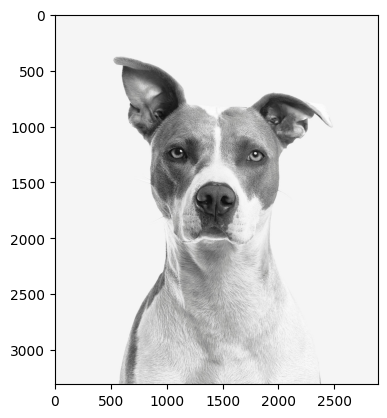

In [20]:
dog =plt.imread('/pexels-gilberto-reyes-825947.jpg')
plt.imshow(dog)

In [21]:
#resize the image
#!pip install scikit-image
from skimage import transform

In [23]:
resize=transform.resize(dog,(32,32,3))

In [24]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 24ms/step
[[2.6046692e-03 1.4500719e-06 5.8446143e-02 1.2068684e-01 4.3938685e-02
  7.6506770e-01 3.9773411e-05 9.1977958e-03 1.5330228e-05 1.5542274e-06]]


In [25]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[5, 3, 2, 4, 7, 0, 6, 8, 9, 1]


In [27]:
 for i in range(1):
        print(classification[list_index[i]])

dog
